Data Observations
1.  The drug Capomulin had the best results, showing a decrease in tumor size, survival rate, and spread of metastatic sites.
2. The other drugs observed had very little effect as they performed the same as the placebo group in terms of tumor volume.
3. Infubinol did not perform as low as the other drugs in spread to metastatic sites.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import islice


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to load
mouse_drug_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

# Read Files

mouse_data_df = pd.read_csv(mouse_drug_data)
#mouse_data_df.head()

trial_data_df = pd.read_csv(clinical_trial_data)
#trial_data_df.head()


In [3]:
# Merge Data into a single dataframe

trial_data_final_df = trial_data_df.merge(mouse_data_df, on=["Mouse ID"], how="left")
trial_data_final_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

tumor_drug_time_df = trial_data_final_df.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].mean()
tumor_drug_time_df

# reset index and rename columns
tumor_drug_time_df = tumor_drug_time_df.reset_index().rename(columns={"Tumor Volume (mm3)":"Avg Tumor Volume (mm3)"})
tumor_drug_time_df.head()

,Drug,Timepoint,Avg Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [12]:
#pivot data

tumor_drug_time_df_trnsp = tumor_drug_time_df.pivot(index='Timepoint', columns='Drug', values='Avg Tumor Volume (mm3)')

tumor_drug_time_df_trnsp



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
#reset index to change timepoint not as index
tumor_drug_time_df_trnsp = tumor_drug_time_df_trnsp.reset_index()
tumor_drug_time_df_trnsp


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [14]:
# Extract drugs needed to plot and put in new dataframe - must leave out timepoint so it is not ploted

plot_data = pd.DataFrame({"Capomulin": tumor_drug_time_df_trnsp["Capomulin"],
                         "Infubinol": tumor_drug_time_df_trnsp["Infubinol"],
                         "Ketapril": tumor_drug_time_df_trnsp["Ketapril"],
                         "Placebo": tumor_drug_time_df_trnsp["Placebo"]})
plot_data

,Capomulin,Infubinol,Ketapril,Placebo
0,45.000000,45.000000,45.000000,45.000000
1,44.266086,47.062001,47.389175,47.125589
2,43.084291,49.403909,49.582269,49.423329
3,42.064317,51.296397,52.399974,51.359742
4,40.716325,53.197691,54.920935,54.364417
5,39.939528,55.715252,57.678982,57.482574
6,38.769339,58.299397,60.994507,59.809063
7,37.816839,60.742461,63.371686,62.420615
8,36.958001,63.162824,66.068580,65.052675
9,36.236114,65.755562,70.662958,68.084082


In [17]:
#create series with time point to use x axis values
timepoint = tumor_drug_time_df_trnsp["Timepoint"]

#print(timepoint)

In [18]:
# Calculate Standard Error of the Mean *double square brakets creates dataframe
tumor_drug_time_SE_df = trial_data_final_df.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].sem()

#reset index

tumor_drug_time_SE_df = tumor_drug_time_SE_df.reset_index()
tumor_drug_time_SE_df

#Pivot data
tumor_drug_time_SE_df = tumor_drug_time_SE_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_drug_time_SE_df

#reset index to move timepoint
tumor_drug_time_SE_df = tumor_drug_time_SE_df.reset_index()
tumor_drug_time_SE_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


In [19]:
#Create Data Frame with Standard Error for drug means
plot_data_SE = pd.DataFrame({"Capomulin": tumor_drug_time_SE_df["Capomulin"],
                            "Infubinol": tumor_drug_time_SE_df["Infubinol"],
                            "Ketapril": tumor_drug_time_SE_df["Ketapril"],
                            "Placebo": tumor_drug_time_SE_df["Placebo"]})

plot_data_SE

,Capomulin,Infubinol,Ketapril,Placebo
0,0.000000,0.000000,0.000000,0.000000
1,0.448593,0.235102,0.264819,0.218091
2,0.702684,0.282346,0.357421,0.402064
3,0.838617,0.357705,0.580268,0.614461
4,0.909731,0.476210,0.726484,0.839609
5,0.881642,0.550315,0.755413,1.034872
6,0.934460,0.631061,0.934121,1.218231
7,1.052241,0.984155,1.127867,1.287481
8,1.223608,1.055220,1.158449,1.370634
9,1.223977,1.144427,1.453186,1.351726


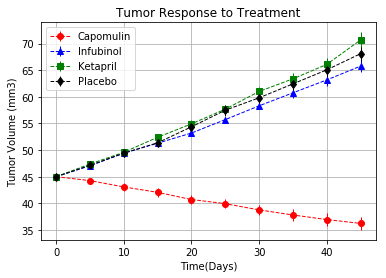

In [14]:
# Plot Standard error bars
#plt.plot(timepoint,plot_data["Capomulin"], label="Capomulin", linestyle='dashed',linewidth=1, color='r', marker='o')
#plt.plot(timepoint,plot_data["Infubinol"], label="Infubinol", linestyle='dashed',linewidth=1, color ='b', marker='^')
#plt.plot(timepoint,plot_data["Ketapril"], label="Ketapril", linestyle='dashed',linewidth=1, color='g', marker='s')
#plt.plot(timepoint,plot_data["Placebo"], label="Placebo", linestyle='dashed',linewidth=1, color='black', marker='d')

# 
#fig, ax = plt.subplots()
plt.errorbar(timepoint,plot_data["Capomulin"],plot_data_SE["Capomulin"], 
             label="Capomulin",linestyle='dashed',linewidth=1, color='r', marker='o')

plt.errorbar(timepoint,plot_data["Infubinol"],plot_data_SE["Infubinol"], 
             label="Infubinol",linestyle='dashed',linewidth=1, color ='b', marker='^')

plt.errorbar(timepoint,plot_data["Ketapril"], plot_data_SE["Ketapril"], 
             label="Ketapril", linestyle='dashed',linewidth=1, color='g', marker='s')

plt.errorbar(timepoint,plot_data["Placebo"], plot_data_SE["Placebo"], 
             label="Placebo", linestyle='dashed',linewidth=1, color='black', marker='d')


plt.legend(loc="best")

#Add labels
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

#Add Grid
plt.grid(axis="both")
plt.show()

In [21]:
#Calculate Avg Metastic Sites by Timepoint

#Chain steps
metsites_drug_time_df = trial_data_final_df.groupby(["Drug","Timepoint"])[["Metastatic Sites"]].mean().reset_index().pivot(
    index="Timepoint", columns="Drug", values="Metastatic Sites").reset_index()

metsites_drug_time_df



Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [22]:
#Calculate Avg Metastic Sites by Timepoint Standard error
metsites_drug_time_SE_df = trial_data_final_df.groupby(["Drug","Timepoint"])[["Metastatic Sites"]].sem().reset_index().pivot(
    index="Timepoint", columns="Drug", values="Metastatic Sites").reset_index()

metsites_drug_time_SE_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


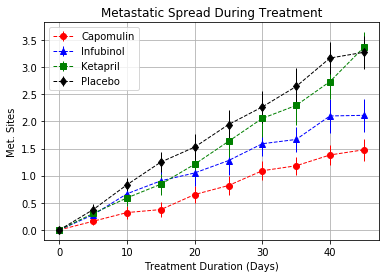

In [23]:
#plot data
plt.errorbar(timepoint,metsites_drug_time_df["Capomulin"],metsites_drug_time_SE_df["Capomulin"], 
             label="Capomulin",linestyle='dashed',linewidth=1, color='r', marker='o')

plt.errorbar(timepoint,metsites_drug_time_df["Infubinol"],metsites_drug_time_SE_df["Infubinol"], 
             label="Infubinol",linestyle='dashed',linewidth=1, color ='b', marker='^')

plt.errorbar(timepoint,metsites_drug_time_df["Ketapril"], metsites_drug_time_SE_df["Ketapril"], 
             label="Ketapril", linestyle='dashed',linewidth=1, color='g', marker='s')

plt.errorbar(timepoint,metsites_drug_time_df["Placebo"], metsites_drug_time_SE_df["Placebo"], 
             label="Placebo", linestyle='dashed',linewidth=1, color='black', marker='d')


plt.legend(loc="best")

#Add labels
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

#Add Grid
plt.grid(axis="both")
plt.show()

In [26]:
###Calculate Survival Rate

#Count the number of mice at each time point - group by timepoint and drug

drug_time_mcount_df = trial_data_final_df.groupby(["Drug", "Timepoint"])[["Mouse ID"]].count()
drug_time_mcount_df

#reset index and rename columns
drug_time_mcount_df = drug_time_mcount_df.reset_index().rename(columns={"Mouse ID":"Mouse Count"})
drug_time_mcount_df





,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [27]:
#calculate survival Rate

#Determine number of mice at time zero for each drug
drug_name = []
mouse_count = []
        
for index, row in drug_time_mcount_df.iterrows():
    if row["Timepoint"] == 0:
        drug_name.append(row["Drug"])
        mouse_count.append(row["Mouse Count"])
#print(drug_name)
#print(mouse_count)

#Create Datafrome with results
sample_num_df = pd.DataFrame({"Drug":drug_name, "SampleCount":mouse_count})
sample_num_df

,Drug,SampleCount
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,26
7,Ramicane,25
8,Stelasyn,26
9,Zoniferol,25


In [28]:
# Survival Rate Cacluation

#drug_time_mcount_df["Survial Rate"] = drug_time_mcount_df["Mouse Count"]/25

#drug_time_mcount_df
rates = []

for index, row in drug_time_mcount_df.iterrows():
    drug_x = row["Drug"]
    m_count = row["Mouse Count"]
    
    for index, row in sample_num_df.iterrows():
        if drug_x == row["Drug"]:
            sample_num = row["SampleCount"]
    
    rate = (m_count / sample_num) * 100
    rates.append(rate)
    #print(drug_x)
    #print(sample_num)
    #print(m_count)
    #print(rate)
#print(Survival_Rate)    
    #row["Survial_Rate"] = m_count / sample_num

drug_time_mcount_df["Survival Rate"] = rates
drug_time_mcount_df

,Drug,Timepoint,Mouse Count,Survival Rate
0,Capomulin,0,25,100.000000
1,Capomulin,5,25,100.000000
2,Capomulin,10,25,100.000000
3,Capomulin,15,24,96.000000
4,Capomulin,20,23,92.000000
5,Capomulin,25,22,88.000000
6,Capomulin,30,22,88.000000
7,Capomulin,35,22,88.000000
8,Capomulin,40,21,84.000000
9,Capomulin,45,21,84.000000


In [29]:
#Pivot Data
drug_time_mcount_df = drug_time_mcount_df.pivot(index="Timepoint", columns="Drug", values="Survival Rate")
drug_time_mcount_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


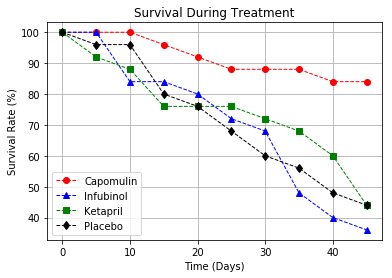

In [30]:
# Plot data
#plot data
plt.plot(timepoint,drug_time_mcount_df["Capomulin"],
             label="Capomulin",linestyle='dashed',linewidth=1, color='r', marker='o')

plt.plot(timepoint,drug_time_mcount_df["Infubinol"], 
             label="Infubinol",linestyle='dashed',linewidth=1, color ='b', marker='^')

plt.plot(timepoint,drug_time_mcount_df["Ketapril"], 
             label="Ketapril", linestyle='dashed',linewidth=1, color='g', marker='s')

plt.plot(timepoint,drug_time_mcount_df["Placebo"],
             label="Placebo", linestyle='dashed',linewidth=1, color='black', marker='d')


plt.legend(loc="best")

#Add labels
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

#Add Grid
plt.grid(axis="both")
plt.show()


In [31]:
# Sort Data to find initial tumor volume and final volume
trial_data_sort_dfx = trial_data_final_df.sort_values(["Mouse ID","Timepoint"], ascending=[True,True])
trial_data_sort_dfx = trial_data_sort_dfx.reset_index().drop(columns="index")
trial_data_sort_dfx

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,a203,0,45.000000,0,Infubinol
1,a203,5,48.508468,0,Infubinol
2,a203,10,51.852437,1,Infubinol
3,a203,15,52.777870,1,Infubinol
4,a203,20,55.173336,1,Infubinol
5,a203,25,56.793208,1,Infubinol
6,a203,30,59.523197,1,Infubinol
7,a203,35,61.931650,2,Infubinol
8,a203,40,63.593490,2,Infubinol
9,a203,45,67.973419,2,Infubinol


In [34]:
rowcount= len(trial_data_sort_dfx["Mouse ID"])-1
#print(rowcount)

mouse_id =[]
int_vol =[]
fin_vol =[]
drug=[]

mcount=0
intcount=0
fincount=0
for x in range(0,rowcount):

    if trial_data_sort_dfx.iloc[x,0] != trial_data_sort_dfx.iloc[x-1,0]:
        mouse_id.append(trial_data_sort_dfx.iloc[x,0])
        int_vol.append(trial_data_sort_dfx.iloc[x,2])
        drug.append(trial_data_sort_dfx.iloc[x,4])
        mcount=mcount+1
        intcount=intcount+1
        
    if trial_data_sort_dfx.iloc[x,0] != trial_data_sort_dfx.iloc[x+1,0]:
        #print(trial_data_sort_df.iloc[x,2])
        fin_vol.append(trial_data_sort_dfx.iloc[x,2])
        fincount=fincount+1
fin_vol.append(trial_data_sort_dfx.iloc[rowcount,2])


plot_data3 = ({"MouseID": mouse_id,
              "Fin_Vol": fin_vol,
              "Int_Vol": int_vol,
              "Drug": drug})

plot_3_df = pd.DataFrame(plot_data3)

#rearrange columns
plot_3_df =  plot_3_df[["MouseID","Drug","Int_Vol","Fin_Vol"]]
plot_3_df.head(100)

,MouseID,Drug,Int_Vol,Fin_Vol
0,a203,Infubinol,45.0,67.973419
1,a251,Infubinol,45.0,65.525743
2,a262,Placebo,45.0,70.717621
3,a275,Ceftamin,45.0,62.999356
4,a366,Stelasyn,45.0,63.440686
5,a401,Zoniferol,45.0,66.794156
6,a411,Ramicane,45.0,38.407618
7,a444,Ramicane,45.0,43.047543
8,a457,Ketapril,45.0,49.783419
9,a492,Stelasyn,45.0,60.122011


In [35]:
# Calculate tumor volume change for each mouse
plot_3_df["Vol Change"] = plot_3_df["Fin_Vol"] - plot_3_df["Int_Vol"]
plot_3_df["Perc_Change"] = plot_3_df["Vol Change"]  / plot_3_df["Int_Vol"]*100
plot_3_df

,MouseID,Drug,Int_Vol,Fin_Vol,Vol Change,Perc_Change
0,a203,Infubinol,45.0,67.973419,22.973419,51.052042
1,a251,Infubinol,45.0,65.525743,20.525743,45.612762
2,a262,Placebo,45.0,70.717621,25.717621,57.150268
3,a275,Ceftamin,45.0,62.999356,17.999356,39.998569
4,a366,Stelasyn,45.0,63.440686,18.440686,40.979303
5,a401,Zoniferol,45.0,66.794156,21.794156,48.431458
6,a411,Ramicane,45.0,38.407618,-6.592382,-14.649737
7,a444,Ramicane,45.0,43.047543,-1.952457,-4.338794
8,a457,Ketapril,45.0,49.783419,4.783419,10.629820
9,a492,Stelasyn,45.0,60.122011,15.122011,33.604468


In [36]:
#Calculate the average % change for each drug

plot_3_df2 = plot_3_df.groupby(["Drug"])[["Perc_Change"]].mean()

plot_3_df2 = plot_3_df2.reset_index()
plot_3_df2

,Drug,Perc_Change
0,Capomulin,-18.516516
1,Ceftamin,28.342171
2,Infubinol,30.442222
3,Ketapril,39.569314
4,Naftisol,36.012793
5,Placebo,34.463143
6,Propriva,25.541964
7,Ramicane,-19.574688
8,Stelasyn,35.698830
9,Zoniferol,31.513906


In [37]:
# extract all values in 
Drug_Name = ["Capomulin", "Infubinol","Ketapril", "Placebo"]
percent =[]

for x in range(0,4):
    drugname = Drug_Name[x]
    
    for index, row in plot_3_df2.iterrows():
        if row["Drug"] == drugname:
            percent.append(row["Perc_Change"])
print(percent)    

[-18.516516180560004, 30.442222400266665, 39.56931434286223, 34.463142991493335]


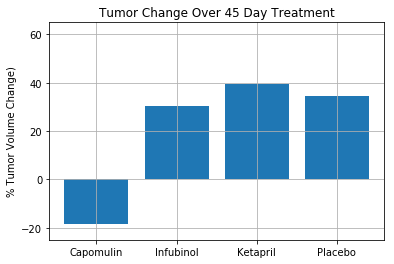

In [38]:
# Plot data
Drug_Name = ["Capomulin", "Infubinol","Ketapril", "Placebo"]

#plot data
x_axis = np.arange(len(percent))

plt.bar(x_axis, percent, align="center")

plt.xticks(x_axis,Drug_Name)

plt.ylim(-25,65)

plt.yticks([-20,0,20,40,60])

#Add labels

plt.ylabel("% Tumor Volume Change)")
plt.title("Tumor Change Over 45 Day Treatment")

#Add Grid
plt.grid(axis="both")
plt.show()
